In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Tempearture_data.csv', index_col='DATE', parse_dates=True)
df = pd.DataFrame(data)
df.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


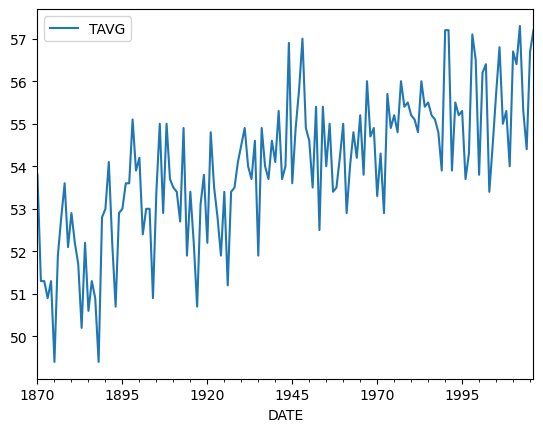

In [3]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

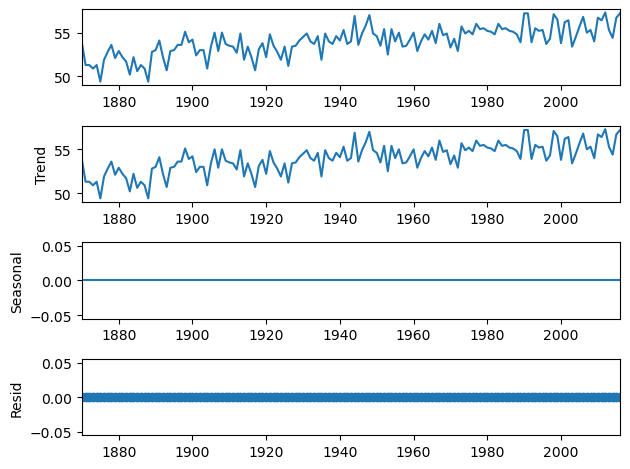

In [4]:
#decomposing ts into trend, seasonality and residual
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive')
result.plot()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

# Compute and print ADF p-value
result = adfuller(df['TAVG'])
print("The p-value for the ADF test is ", result[1])

The p-value for the ADF test is  0.5958645454049813


In [6]:
data_diff = df.diff(3).dropna()

In [7]:
result = adfuller(data_diff['TAVG'])
print("The p-value for the ADF test is ", result[1])

The p-value for the ADF test is  0.00010579725711636831


C:\Users\PC\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


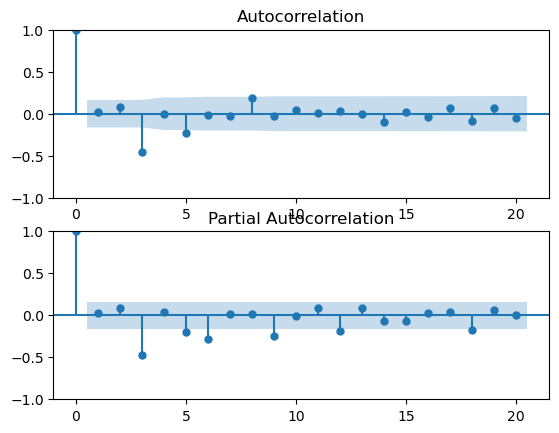

In [8]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and PACF
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(data_diff, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(data_diff, lags=20, ax=axes[1])
plt.show()

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [11]:
# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(data_diff, order=(1,0,0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

The AIC for an AR(1) is:  547.6203470629234


In [12]:
# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(data_diff, order=(2,0,0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

The AIC for an AR(2) is:  548.5917481850748


In [13]:
# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(df, trend='t', order=(1,1,1))
res = mod.fit()

In [14]:
forecast = res.forecast(steps=30)
forecast.tail(10)

2037-01-01    56.689529
2038-01-01    56.718216
2039-01-01    56.746904
2040-01-01    56.775591
2041-01-01    56.804279
2042-01-01    56.832966
2043-01-01    56.861654
2044-01-01    56.890341
2045-01-01    56.919029
2046-01-01    56.947716
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [15]:
# Import the plot_predict module from statsmodels
from statsmodels.graphics.tsaplots import plot_predict

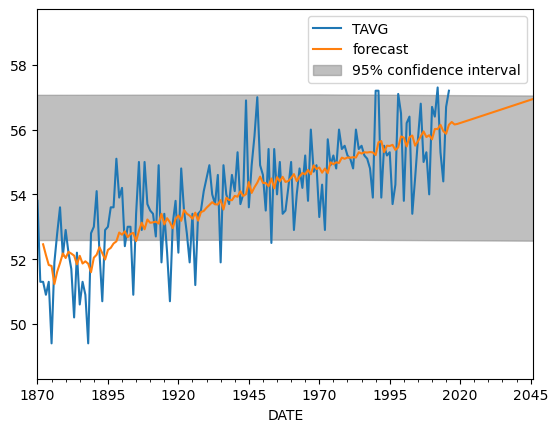

In [16]:
# Plot the original series and the forecasted series
fig, ax = plt.subplots()
df.plot(ax=ax)
plot_predict(res, start='1872', end='2046', ax=ax)
plt.show()

In [17]:
 # Align the indices
actual_values = df[-len(forecast):] 

# Calculate MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actual_values, forecast)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.2784750948944756
